In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.signal as signal
import scipy.ndimage as nd
import math
from skimage import io
from skimage import color

In [2]:
def getTime(function, *arg):
  start = time.perf_counter()
  function(*arg)
  stop = time.perf_counter()
  return stop - start

Image shape:  (458, 458)
Image type:  float64
Min/Max: 0.0 1.0


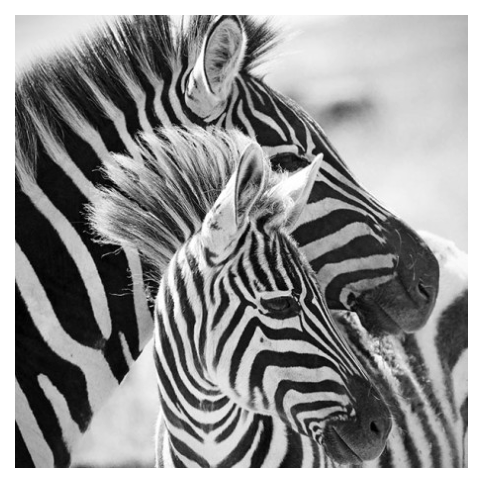

In [3]:
image = io.imread("zebras.jpg")

image = color.rgb2gray(image)

print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

plt.figure(dpi=150)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

Image shape:  (458, 458)
Image type:  float64
Min/Max: 0.0 1.0


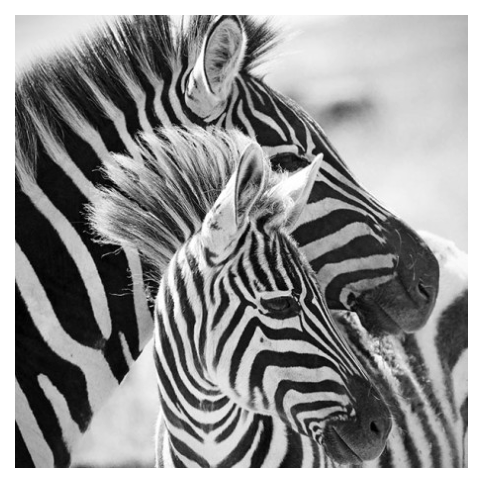

In [4]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) # normalize to [0-1]
image = normalize(image)

print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

plt.figure(dpi=150)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

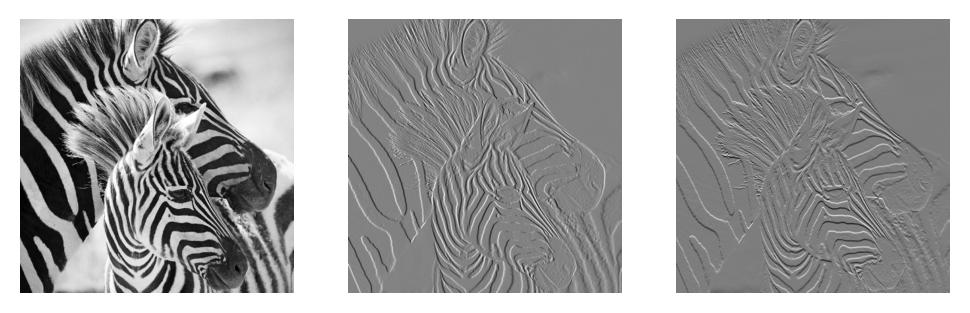

In [5]:
gradient_y, gradient_x = np.gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()


In [6]:
def our_gradient(image):
  # df(x, y) / dx = (f(x + 1, y) - f(x - 1, y)) / 2
  # df(x, y) / dx = (f(x + 1, y) - f(x, y)) / 2
  # df(x, y) / dx = (f(x, y) - f(x - 1, y)) / 2
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)

  gradient_y[1:-1, :] = (image[2:, :] - image[0:-2, :]) / 2
  gradient_x[:, 1:-1] = (image[:, 2:] - image[:, 0:-2]) / 2

  # forward gradient on image boundaries
  gradient_y[0, :] = (image[1, :] - image[0, :]) / 2
  gradient_x[: , 0] = (image[:, 1] - image[:, 0]) / 2

  # backward gradient on image boundaries
  gradient_y[-1, :] = (image[-1, :] - image[-2, :]) / 2
  gradient_x[:, -1] = (image[:, -1] - image[:, -2]) / 2 

  return gradient_y, gradient_x


In [7]:
# gradient using for loop 

def our_gradient2(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      
      if i == 0:
        gradient_y[i, j] = (image[i + 1, j] - image[i, j]) / 2
      elif i == image.shape[0] - 1:
        gradient_y[i, j] = (image[i, j] - image[i - 1, j]) / 2
        
      elif j == 0:
        gradient_x[i, j] = (image[i, j + 1] - image[i, j]) / 2
      elif j == image.shape[1] - 1:
        gradient_x[i, j] = (image[i, j] - image[i, j - 1]) / 2

      else:
        gradient_y[i, j] = (image[i + 1, j] - image[i - 1, j]) / 2
        gradient_x[i, j] = (image[i, j + 1] - image[i, j - 1]) / 2

  return gradient_y, gradient_x

In [8]:
def getTime(function, *arg):
  start = time.perf_counter()
  function(*arg)
  stop = time.perf_counter()
  return stop - start

print(getTime(our_gradient, image))
print(getTime(our_gradient2, image))

0.0028925480000054904
0.5076079699999809


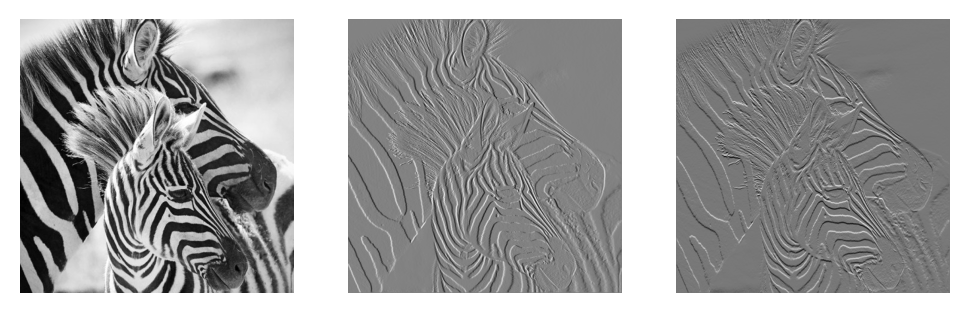

In [9]:
gradient_y, gradient_x = our_gradient2(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()


In [10]:
def our_gradient_2(image):
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x) / 2  # korelacja
  gradient_y = signal.correlate2d(image, window_y) / 2
  # gradient_x = signal.convolve2d(image, window_x)  <-- splot, można go zastosować, ale najpierw trzeba odwrócić macierz (zamiana -1 z 1)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

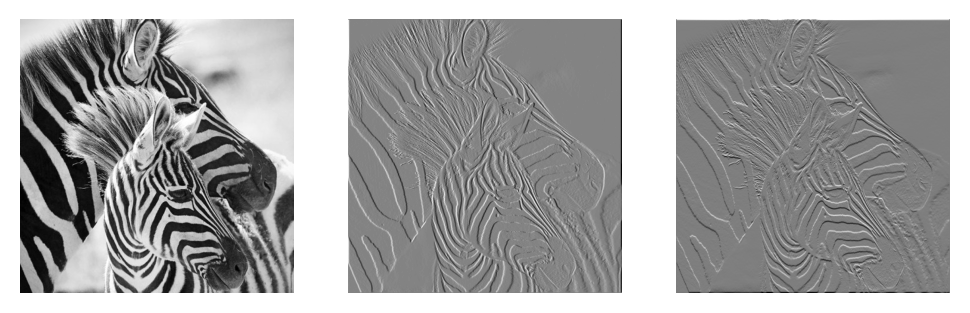

In [11]:
gradient_y, gradient_x = our_gradient_2(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
def sobel_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  return gradient_y, gradient_x

def prewitt_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  return gradient_y, gradient_x

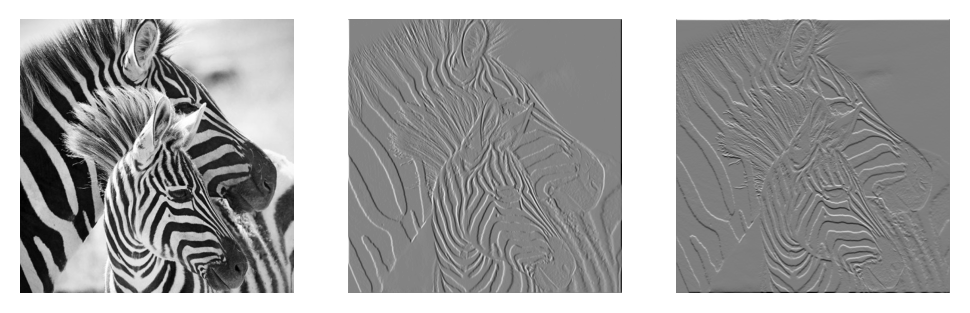

In [13]:
gradient_y, gradient_x = sobel_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

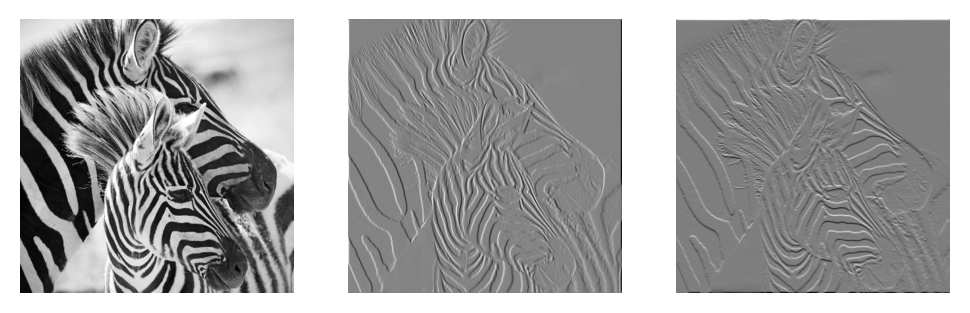

In [14]:
gradient_y, gradient_x = prewitt_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

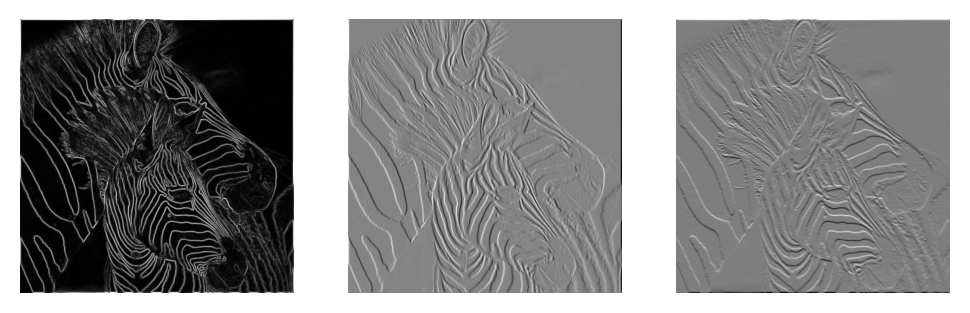

In [15]:
gradient_magnitude = lambda gradient_x, gradient_y: np.sqrt(gradient_x**2 + gradient_y**2)

g_mag = gradient_magnitude(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_mag, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

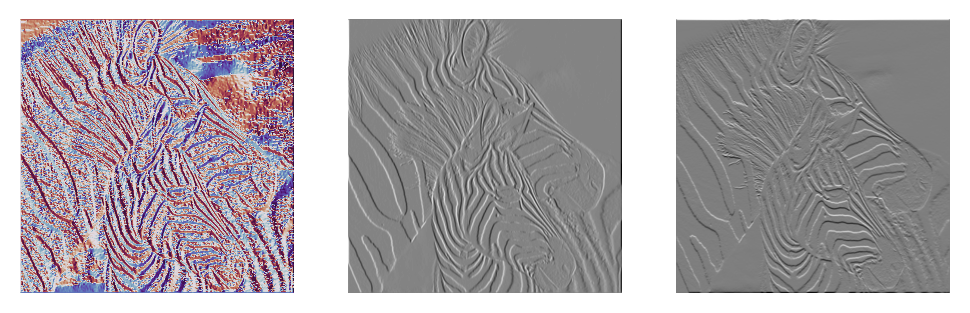

In [16]:
# implementation gradient angle

gradient_angle = lambda gradient_x, gradient_y: np.arctan2(gradient_y, gradient_x)  # * 180 / np.pi --> stopnie
g_angle = gradient_angle(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_angle, cmap='twilight_shifted')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

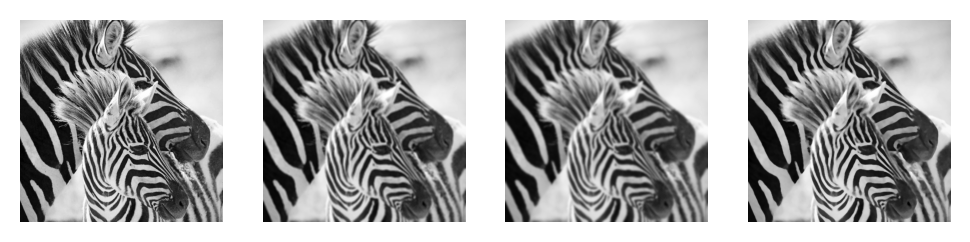

In [17]:
uni_image = nd.uniform_filter(image, 5)
gaussian_image = nd.gaussian_filter(image, 2)
median_image = nd.median_filter(image, 5)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.show()

In [18]:
# implementation uniform filter without built-in function

def our_uniform_filter(image, filter_size):
  window = np.ones((filter_size, filter_size))
  window /= np.sum(window)
  uni_image = signal.convolve2d(image, window, mode="same")
  return uni_image 
  
  #return nd.generic_filter(image, np.mean, mode='reflect', cval=0.0, size=7)

In [19]:
def my_uniform_filter(image, filter_size):
  window = np.ones((filter_size, filter_size))
  window /= np.sum(window)
  uni_image = signal.convolve2d(image, window, mode="same")  

  ii = filter_size // 2
  ij = filter_size // 2 
  uni_image[:ii,:] = 0
  uni_image[:,:ij] = 0
  uni_image[uni_image.shape[0]-ii:, :] = 0
  uni_image[:, uni_image.shape[0]-ij:] = 0

  for i in range(1, ii+1):
    for j in range(1, ij+1):
      for y in range(image.shape[0]):
        for x in range(image.shape[1]):
          if (y-ii == -i and x-ij == -j):                                                                # l-g róg
            uni_image[y, x] = np.mean(image[y-ii+i: y+ii+1, x-ij+j: x+ij+1])
          elif (y-ii == -i and x+ij == image.shape[1]-1+j):                                                # p-g róg
            uni_image[y, x] = np.mean(image[y-ii+i: y+ii+1, x-ij: x+ij+1-j])
          elif (x-ij == -j and y+ii == image.shape[0]-1+i):                                                # l-d róg
            uni_image[y, x] = np.mean(image[y-ii: y+ii+1-i, x-ij+j: x+ij+1])
          elif (y+ii == image.shape[0]-1+i and x+ij == image.shape[1]-1+j):                                # p-d róg
            uni_image[y, x] = np.mean(image[y-ii: y+ii+1-i, x-ij: x+ij-j])

          if uni_image[y, x] == 0:
            if (y-ii == -i):                                                                               # lewy brzeg
              uni_image[y, x] = np.mean(image[y-ii+i: y+ii+1, x-ij: x+ij+1])
            elif (y+ii == image.shape[0]-1+i):                                                             # prawy brzeg
              uni_image[y, x] = np.mean(image[y-ii: y+ii+1-i, x-ij: x+ij+1])
            elif (x-ij == -j):                      #(0,1)                                                 # górny brzeg
              uni_image[y, x] = np.mean(image[y-ii: y+ii+1, x-ij+j: x+ij+1])
            elif (x+ij == image.shape[1]-1+j):                                                             # dolny brzeg
              uni_image[y, x] = np.mean(image[y-ii: y+ii+1, x-ij: x+ij+1-j])

  return uni_image

In [20]:
# implementation median filter without built-in function
def my_median_filter(image, filter_size=(5,5)):
  ii = filter_size[0] // 2
  ij = filter_size[1] // 2
  median_image = np.zeros(image.shape)
  for i in range(1, ii+1):                 
    for j in range(1, ij+1):               
      for y in range(image.shape[0]):      
        for x in range(image.shape[1]):
          if (y-ii >= 0) and (x-ij >= 0) and (y+ii < image.shape[0]) and (x+ij < image.shape[1]):          # środek
            median_image[y, x] = np.median(image[y-ii: y+ii+1, x-ij: x+ij+1])
            
          elif (y-ii == -i and x-ij == -j):             #+(0,1)                                            # l-g róg
            median_image[y, x] = np.median(image[y-ii+i: y+ii+1, x-ij+j: x+ij+1])
          elif (y-ii == -i and x+ij == image.shape[1]-1+j):                                                # p-g róg
            median_image[y, x] = np.median(image[y-ii+i: y+ii+1, x-ij: x+ij+1-j])
          elif (x-ij == -j and y+ii == image.shape[0]-1+i):                                                # l-d róg
            median_image[y, x] = np.median(image[y-ii: y+ii+1-i, x-ij+j: x+ij+1])
          elif (y+ii == image.shape[0]-1+i and x+ij == image.shape[1]-1+j):                                # p-d róg
            median_image[y, x] = np.median(image[y-ii: y+ii+1-i, x-ij: x+ij-j])

          if median_image[y, x] == 0:
            if (y-ii == -i):                                                                               # lewy brzeg
              median_image[y, x] = np.median(image[y-ii+i: y+ii+1, x-ij: x+ij+1])
            elif (y+ii == image.shape[0]-1+i):                                                             # prawy brzeg
              median_image[y, x] = np.median(image[y-ii: y+ii+1-i, x-ij: x+ij+1])
            elif (x-ij == -j):                      #-(0,1)                                                # górny brzeg
              median_image[y, x] = np.median(image[y-ii: y+ii+1, x-ij+j: x+ij+1])
            elif (x+ij == image.shape[1]-1+j):                                                             # dolny brzeg
              median_image[y, x] = np.median(image[y-ii: y+ii+1, x-ij: x+ij+1-j])

  return median_image

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


36.658747929000015


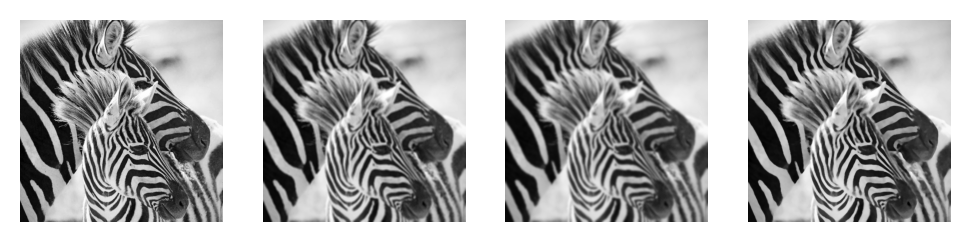

In [22]:
my_uni_image = my_uniform_filter(image, 5)
gaussian_image = nd.gaussian_filter(image, 2)
my_median_image = my_median_filter(image, (5,5))

print(getTime(my_median_filter, image, (5,5)))

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(my_uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(my_median_image, cmap='gray')
plt.axis('off')
plt.show()

In [23]:
def laplacian(image):
  window = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]                     
  ])
  laplacian_image = signal.correlate2d(image, window)
  return laplacian_image

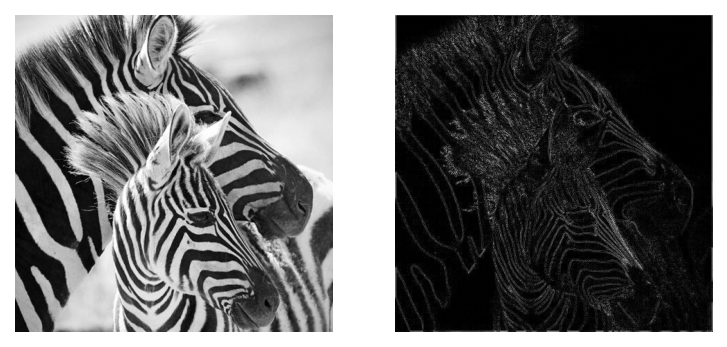

In [24]:
laplacian_image = laplacian(image)

plt.figure(dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.show()